In [576]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

In [489]:
data = pd.read_csv("data/immobilier.csv")

In [488]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


On souhaite prédire la colonne "SalePrice". Donc toutes les autres colonnes sont des variables à faire apprendre

In [309]:
features = [col for col in  data.columns if col not in "SalePrice"]

In [310]:
features

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [311]:
train = data[features]
y = data.SalePrice

In [312]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [313]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

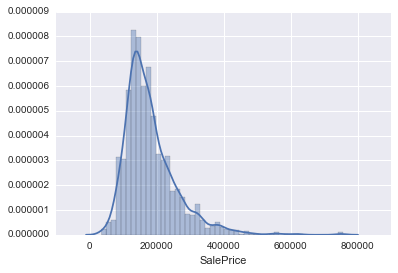

In [314]:
sns.distplot(y)

In [315]:
# Modele pour la regression
from sklearn.linear_model import Ridge

In [316]:
# Initialisation du model
model_ridge = Ridge()

In [317]:
# 1) On fait apprendre le model
model_ridge.fit(train, y)

# Error ...

ValueError: could not convert string to float: Normal

Le model peux prendre en entré que des chiffre, il faut donc transformer les données en string en chiffre

In [318]:
data['SaleCondition'].head()

0     Normal
1     Normal
2     Normal
3    Abnorml
4     Normal
Name: SaleCondition, dtype: object

In [319]:
pd.get_dummies(data['SaleCondition']).head()

,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0


In [320]:
def prepare_data(data):
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    train = data[features]
    y = data.SalePrice
    
    # Transform Object features to columns
    train = pd.get_dummies(train)
    
    return train, y

In [321]:
train, y = prepare_data(data.copy())

In [322]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [323]:
# 2) On fait apprendre le model
model_ridge.fit(train, y)

# Error ...

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Il y a des données manquante qui ne peuvent pas etre prisent en compte par la modèle, il faut donc les remplacer 

In [324]:
pd.isnull(data).sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [325]:
def prepare_data(data):
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    train = data[features]
    y = data.SalePrice
    
    # Transform Object features to columns
    train = pd.get_dummies(train) 
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())

    return train, y

In [326]:
train, y = prepare_data(data.copy())

In [327]:
# 3) On fait apprendre le model
model_ridge.fit(train, y)

# yeah !!!

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

## Compréhension du Score de performance de notre modèle :

In [328]:
from sklearn.metrics import mean_absolute_error

In [329]:
vrai = np.array([1000, 2000, 1500])
prediction = np.array([900, 2200, 1300])

In [330]:
mean_absolute_error(vrai, prediction)

166.66666666666666

In [331]:
1000 - 900

100

In [332]:
2000 - 2200

-200

In [333]:
1500 - 1300

200

In [334]:
(100 + 200 + 200) / 3.0

166.66666666666666

### Contruction de notre stratégie de Cross - Validation

In [335]:
def cross_validation(model, train, y, cv=5):
    rmse = -cross_val_score(model, train, y, scoring="neg_mean_absolute_error", cv = cv)
    return(rmse)

In [336]:
score = cross_validation(model_ridge, train, y)
print score

[ 17781.7821806   19834.62785741  19109.55973426  17004.7525164
  19526.64170021]


In [337]:
score.mean(), score.std()

(18651.472797776139, 1081.0799784470737)

**Voila notre 1er score** !!

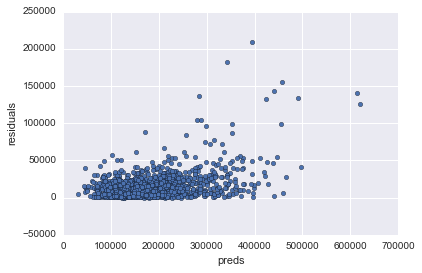

In [338]:
preds = pd.DataFrame({"preds":model_ridge.predict(train), "true":y})
preds["residuals"] = np.abs(preds["true"] - preds["preds"])
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [339]:
preds[preds.residuals >150000]

,preds,true,residuals
523,393778.481732,184750,209028.481732
898,456930.415789,611657,154726.584211
1298,341589.949296,160000,181589.949296


In [340]:
def prepare_data_outlier(data):
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    #on enleve les id qui sont trop extreme
    data = data.drop(data.index[[523,898, 1298]])
    
    train = data[features]
    y = data.SalePrice
    
    # Transform Object features to columns
    train = pd.get_dummies(train)
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())
    
    return train, y

In [341]:
train, y = prepare_data(data.copy())
print train.shape, y.shape

(1460, 289) (1460,)


In [342]:
score = cross_validation(model_ridge, train, y)
print score.mean()

18651.4727978


In [343]:
train, y = prepare_data_outlier(data.copy())
print train.shape, y.shape

(1457, 288) (1457,)


In [344]:
score = cross_validation(model_ridge, train, y)
print score.mean()

16905.6301599


## Faire nos premières prédictions :

In [374]:
# On prépare nos données de façon classique
train, y = prepare_data(data.copy())
train, y = prepare_data_outlier(data.copy())

In [375]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(train, y, random_state = 3)

In [376]:
model_ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [377]:
mes_predictions = model_ridge.predict(X_validation)

In [378]:
# Mes prédiction
mes_predictions[0:5]

array([ 114797.30071449,  118600.5411647 ,  188829.58876365,
        145938.21237563,  140842.54231623])

In [379]:
# Les vrai valeurs 
y_validation[0:5]

140    115000
951    119900
248    180000
738    179000
569    135960
Name: SalePrice, dtype: int64

In [380]:
mean_absolute_error(y_validation, mes_predictions)

16816.868249501651

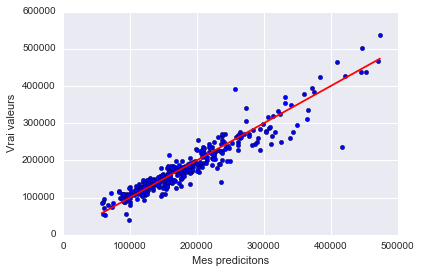

In [381]:
plt.scatter(mes_predictions, y_validation)
plt.plot([min(mes_predictions),max(mes_predictions)], [min(mes_predictions),max(mes_predictions)], c="red")
plt.xlabel('Mes predicitons')
plt.ylabel('Vrai valeurs')

Une valeur semble complétement perdu; on prédit 900.000 alors qu'elle devrait etre à moins de 200.000 ...

In [382]:
analyse = X_validation.copy()

In [383]:
analyse.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
140,141,20,70.00000,10500,4,5,1971,1971,0.0,432,...,0,0,0,0,0,0,0,0,1,0
951,952,20,60.00000,7800,5,5,1965,1965,0.0,641,...,0,0,0,1,1,0,0,0,0,0
248,249,60,72.00000,11317,7,5,2003,2003,101.0,0,...,0,0,0,1,0,0,0,0,1,0
738,739,90,60.00000,10800,5,5,1987,1988,0.0,1200,...,0,0,0,1,0,0,1,0,0,0
569,570,90,69.77212,7032,5,5,1979,1979,0.0,943,...,0,0,0,1,0,0,0,0,1,0


In [384]:
analyse['prix'] = y_validation

In [385]:
analyse['prediction'] = mes_predictions

In [386]:
analyse[analyse.prediction >= 800000]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,prix,prediction


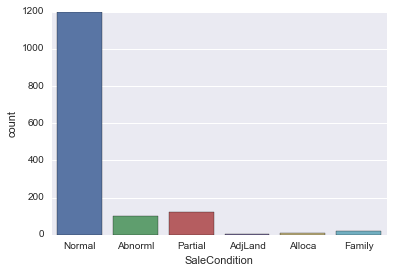

In [387]:
sns.countplot(data.SaleCondition)

### transformation de notre Prix pour améliorer le score : 

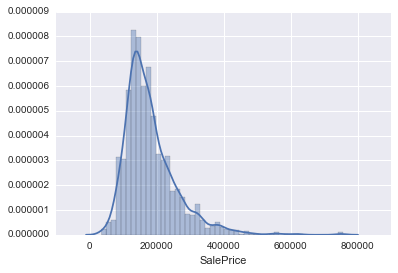

In [388]:
sns.distplot(data.SalePrice)

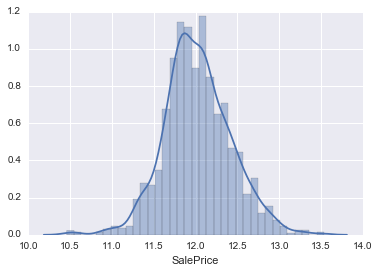

In [389]:
sns.distplot(np.log1p(data.SalePrice))

In [390]:
valeur_log = np.log1p(20)
valeur_log

3.044522437723423

In [391]:
np.expm1(valeur_log)

20.0

In [409]:
def prepare_data_log(data):
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    train = data[features]
    y = data.SalePrice
    # Transforme log
    y = np.log1p(y)
    
    # Transform Object features to columns
    train = pd.get_dummies(train) 
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())

    return train, y

In [410]:
train, y = prepare_data_log(data)

In [411]:
score = cross_validation(model_ridge, train, y)
print score.mean()

0.0902204189461


In [412]:
X_train, X_validation, y_train, y_validation = train_test_split(train, y, random_state = 3)

In [413]:
model_ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [414]:
mes_predictions = model_ridge.predict(X_validation)

In [415]:
mes_predictions[0:5]

array([ 11.56322985,  11.84090375,  12.16291362,  12.18622392,  12.50288167])

In [416]:
# Les vrai valeurs 
y_validation[0:5]

140     11.652696
950     11.767575
248     12.100718
1360    12.149508
568     12.665398
Name: SalePrice, dtype: float64

In [417]:
mean_absolute_error(y_validation, mes_predictions)

0.090238412085009004

In [418]:
mes_predictions_exp = np.expm1(mes_predictions)
y_validation_exp = np.expm1(y_validation)

In [419]:
# Redonner les valeurs un transformation normal (exp)
mean_absolute_error(y_validation_exp, mes_predictions_exp)

20652.779026301429

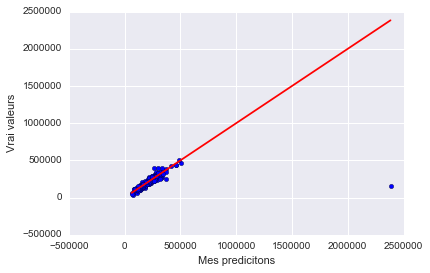

In [420]:
plt.scatter(mes_predictions_exp, y_validation_exp)
plt.plot([min(mes_predictions_exp),max(mes_predictions_exp)], [min(mes_predictions_exp),max(mes_predictions_exp)]
         , c="red")
plt.xlabel('Mes predicitons')
plt.ylabel('Vrai valeurs')

In [408]:
def prepare_data_outlier_log(data):
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    #on enleve les id qui sont trop extreme
    data = data.drop(data.index[[523,898, 1298]])
    
    train = data[features]
    y = data.SalePrice
    # Transforme log
    y = np.log1p(y)
    
    # Transform Object features to columns
    train = pd.get_dummies(train) 
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())

    return train, y

In [421]:
train, y = prepare_data_outlier_log(data)

In [422]:
score = cross_validation(model_ridge, train, y)
print score.mean()

0.0828581382524


In [423]:
X_train, X_validation, y_train, y_validation = train_test_split(train, y, random_state = 3)

In [424]:
model_ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [425]:
mes_predictions = model_ridge.predict(X_validation)

In [426]:
mes_predictions[0:5]

array([ 11.48383154,  11.69299838,  12.16844758,  11.7510565 ,  11.87693117])

In [427]:
# Les vrai valeurs 
y_validation[0:5]

140    11.652696
951    11.694422
248    12.100718
738    12.095147
569    11.820123
Name: SalePrice, dtype: float64

In [428]:
mes_predictions_exp = np.expm1(mes_predictions)
y_validation_exp = np.expm1(y_validation)

In [429]:
# Redonner les valeurs un transformation normal (exp)
mean_absolute_error(y_validation_exp, mes_predictions_exp)

13946.253895956104

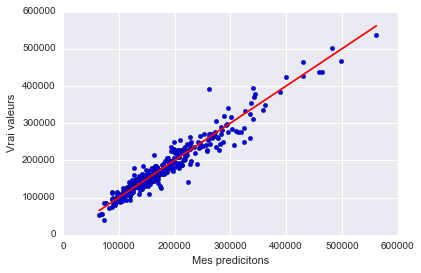

In [430]:
plt.scatter(mes_predictions_exp, y_validation_exp)
plt.plot([min(mes_predictions_exp),max(mes_predictions_exp)], [min(mes_predictions_exp),max(mes_predictions_exp)]
         , c="red")
plt.xlabel('Mes predicitons')
plt.ylabel('Vrai valeurs')

# Paramettre d'un modèle 

In [433]:
model_ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [434]:
model_ridge?

In [445]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [cross_validation(Ridge(alpha = alpha), train, y).mean() 
            for alpha in alphas]

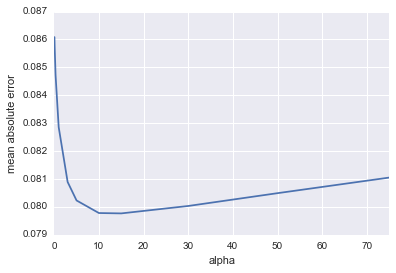

In [446]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot()
plt.xlabel("alpha")
plt.ylabel("mean absolute error")

In [447]:
cv_ridge

0.05     0.086085
0.10     0.085729
0.30     0.084726
1.00     0.082858
3.00     0.080894
5.00     0.080231
10.00    0.079780
15.00    0.079767
30.00    0.080033
50.00    0.080492
75.00    0.081051
dtype: float64

In [450]:
score = cross_validation(Ridge(alpha=10.0), train, y)
print score.mean()

0.0797801519924


In [451]:
X_train, X_validation, y_train, y_validation = train_test_split(train, y, random_state = 3)

In [452]:
model_ridge = Ridge(alpha=10.0)
model_ridge.fit(X_train, y_train)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [453]:
mes_predictions_exp = np.expm1(model_ridge.predict(X_validation))

In [454]:
y_validation_exp = np.expm1(y_validation)

In [455]:
mean_absolute_error(y_validation_exp, mes_predictions_exp)

13720.646365631752

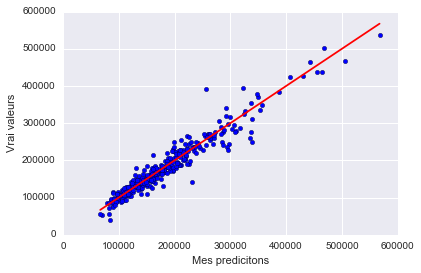

In [456]:
plt.scatter(mes_predictions_exp, y_validation_exp)
plt.plot([min(mes_predictions_exp),max(mes_predictions_exp)], [min(mes_predictions_exp),max(mes_predictions_exp)]
         , c="red")
plt.xlabel('Mes predicitons')
plt.ylabel('Vrai valeurs')

## Aller plus loin : 

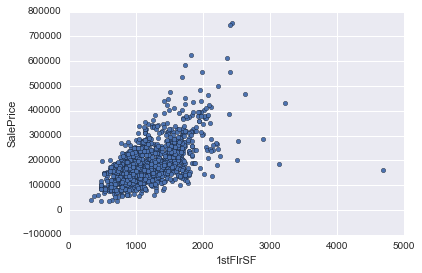

In [480]:
data.plot(kind='scatter', x="1stFlrSF", y='SalePrice')

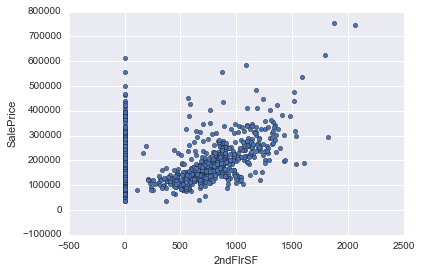

In [481]:
data.plot(kind='scatter', x="2ndFlrSF", y='SalePrice')

In [549]:
data['1stFlr_2ndFlr_Sf'] = data['1stFlrSF'] + data['2ndFlrSF']

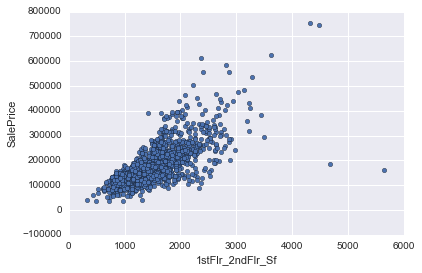

In [550]:
data.plot(kind='scatter', x="1stFlr_2ndFlr_Sf", y='SalePrice')

In [566]:
data[(data['1stFlr_2ndFlr_Sf'] > 4000) & (data.SalePrice <= 200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,1stFlr_2ndFlr_Sf
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,NaN,0,10,2007,New,Partial,184750,4676
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000,5642


In [551]:
def prepare_data_outlier_log_plus(data):

    
    #on enleve les id qui sont trop extreme
    data = data.drop(data.index[[523,898, 1298]])
    data['1stFlr_2ndFlr_Sf'] = np.log1p(data['1stFlrSF'] + data['2ndFlrSF'])
    
    
    features = [col for col in  data.columns if col not in "SalePrice"]
    
    train = data[features]
    
    y = data.SalePrice
    # Transforme log
    y = np.log1p(y)
    
    # Transform Object features to columns
    train = pd.get_dummies(train) 
    
    # Replace Nan value by mean of the column
    train = train.fillna(train.mean())
    
    print train.shape

    return train, y

In [552]:
train, y = prepare_data_outlier_log_plus(data.copy())

(1457, 289)


In [553]:
score = cross_validation(Ridge(alpha=10.0), train, y)
print score.mean()

0.0792136544763


In [554]:
X_train, X_validation, y_train, y_validation = train_test_split(train, y, random_state = 3)

In [555]:
model_ridge = Ridge(alpha=10.0)
model_ridge.fit(X_train, y_train)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [568]:
mes_predictions_exp = np.expm1(model_ridge.predict(X_validation))

In [569]:
y_validation_exp = np.expm1(y_validation)

In [558]:
mean_absolute_error(y_validation_exp, mes_predictions_exp)

13574.609491225863

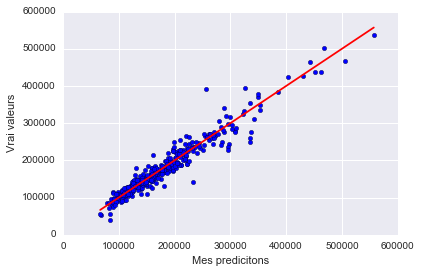

In [567]:
plt.scatter(mes_predictions_exp, y_validation_exp)
plt.plot([min(mes_predictions_exp),max(mes_predictions_exp)], [min(mes_predictions_exp),max(mes_predictions_exp)]
         , c="red")
plt.xlabel('Mes predicitons')
plt.ylabel('Vrai valeurs')

In [574]:
model_ridge.coef_[0:10]

array([ -1.18773883e-05,  -1.58106624e-04,   4.24747987e-04,
         2.32627294e-06,   4.54473409e-02,   4.36414560e-02,
         1.98938785e-03,   5.81423262e-04,   2.44968489e-06,
         5.45623783e-05])

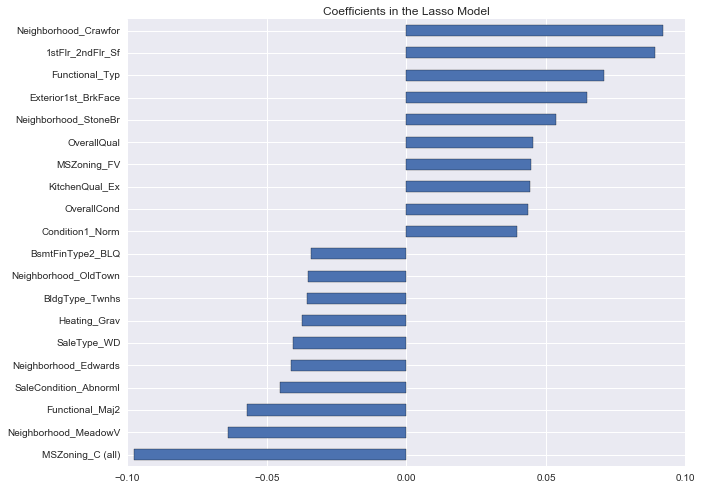

In [578]:
coef = pd.Series(model_ridge.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
imp_coef.plot(kind = "barh", figsize=(10, 8))
plt.title("Coefficients in the Lasso Model")